# The Project of Unsupervised machine Learning

### The Wholesale Customers Dataset by using Unsupervised Learning

## Introduction

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units on diverse product categories.

The goal is to use KMeans clustering technique to segment customers. Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Thus, there is no outcome to be predicted, and the algorithm just tries to find patterns in the data

## Variables

# Importing Libraries

In [2]:
# Importing the Libraries
import numpy as np 
import pandas as pd 

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring Data



In [3]:
# Load dataset and make DataFrame

df = pd.read_csv(r"C:\Users\chait\Downloads\Wholesale customers data.csv")
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.shape

(440, 8)

In [5]:
df.keys()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
#List of Different Region
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [63]:
#List of Different Channel
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [7]:
#Turn the Statistical Summary of the Data
df. describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
# Here we count..There are any missing values in dataset 
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

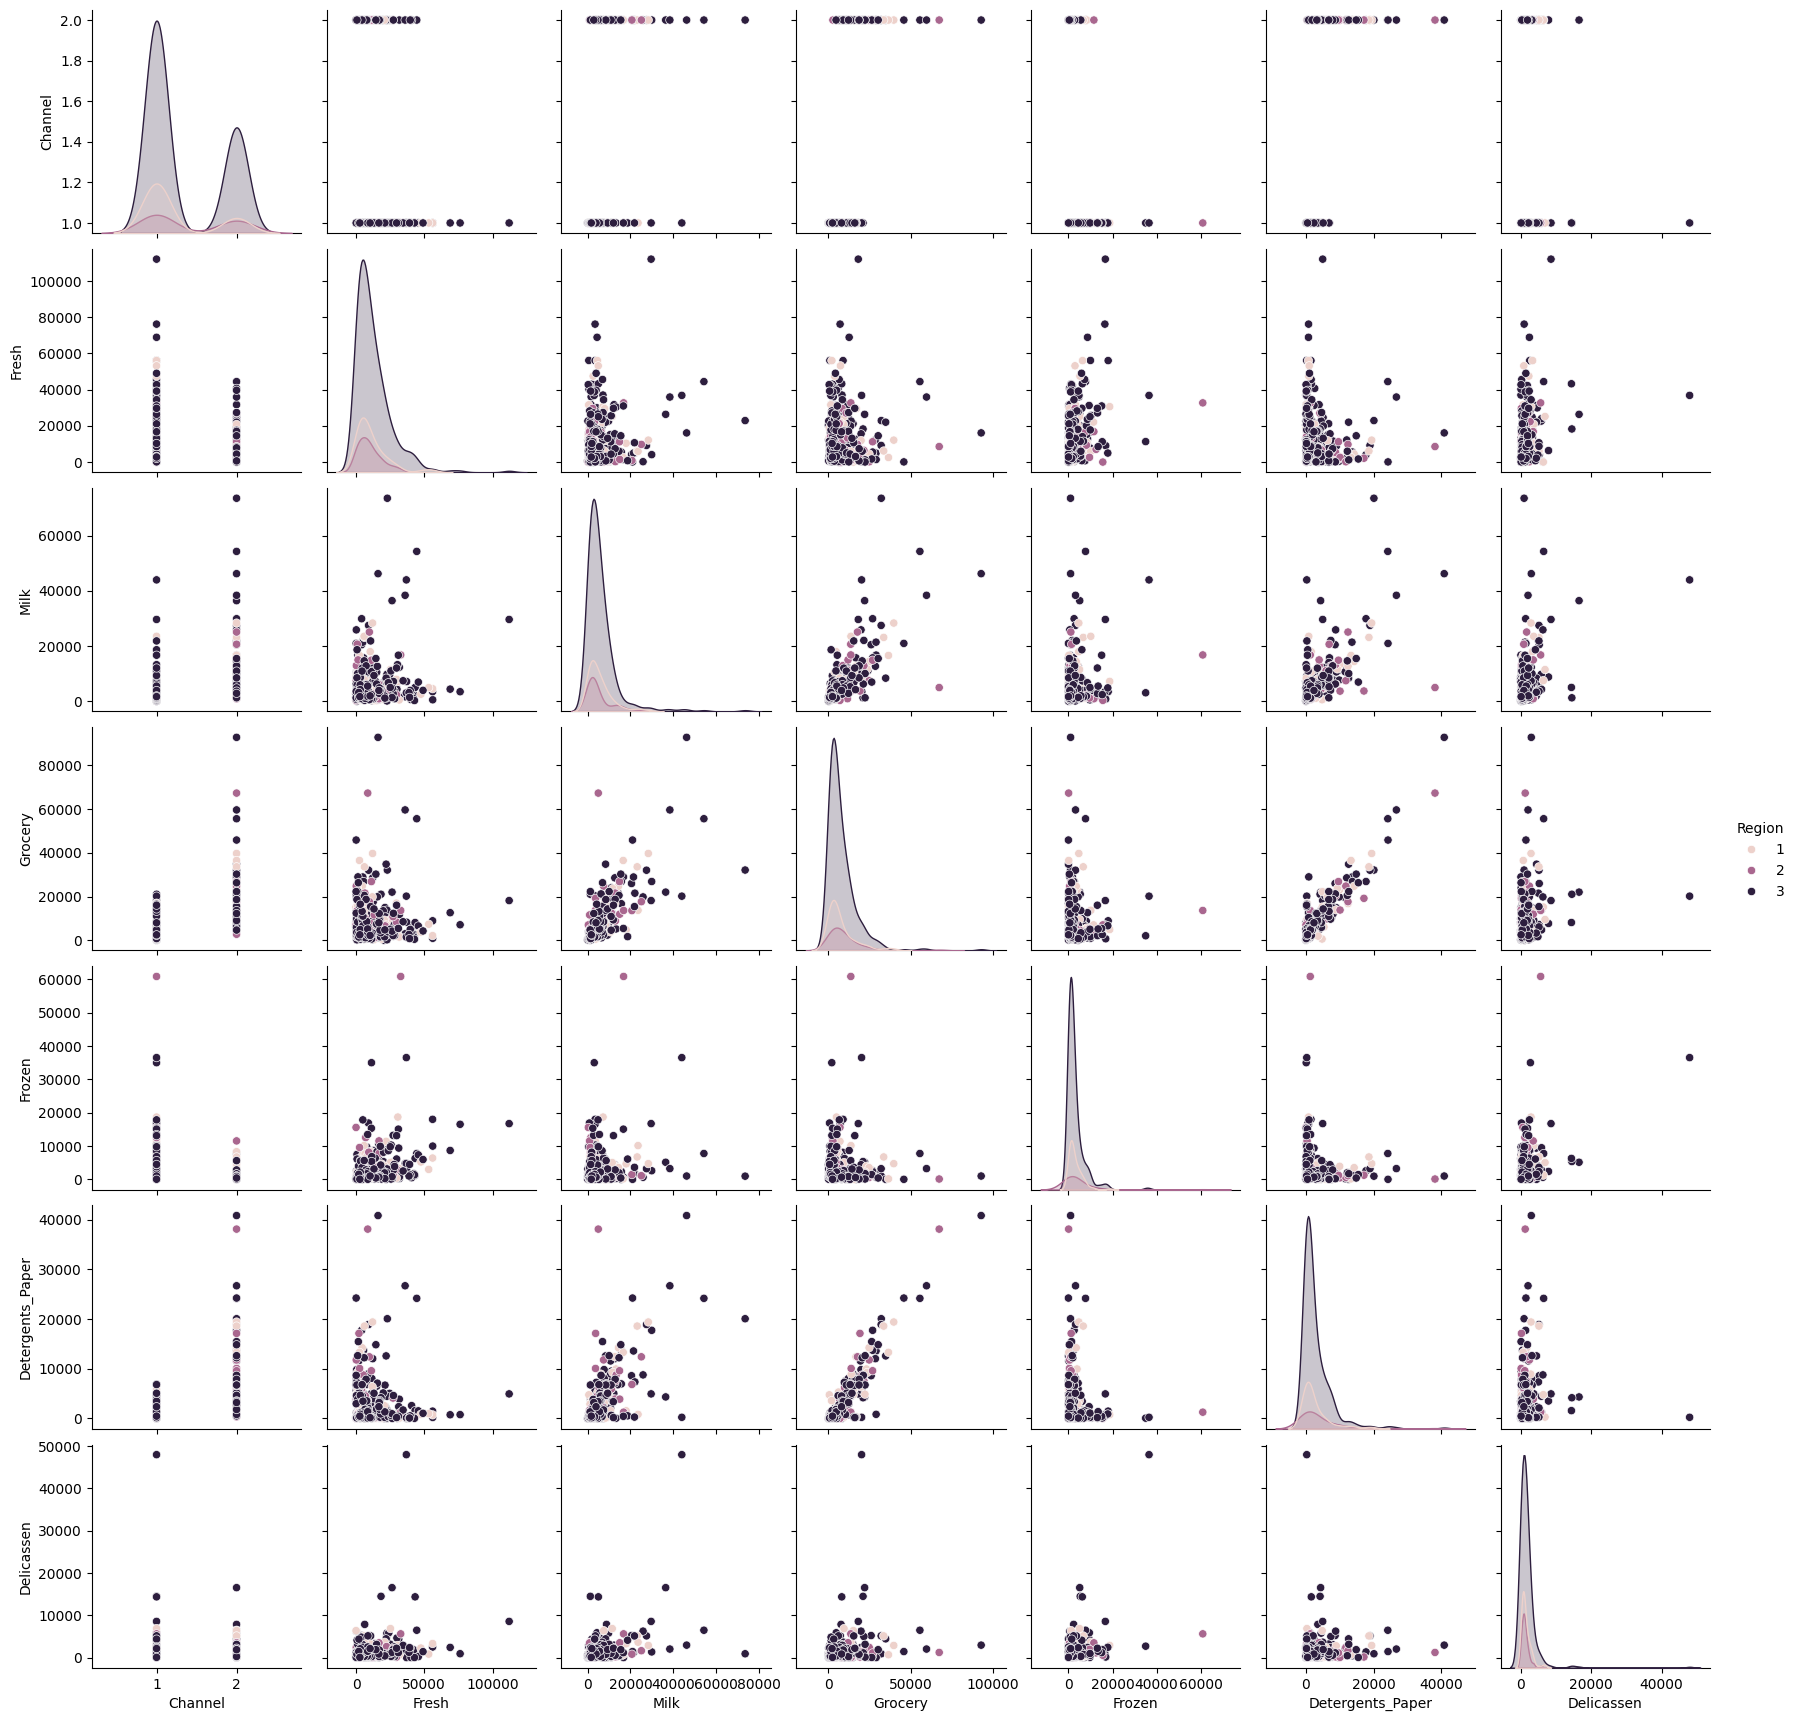

In [10]:
sns.pairplot(df,hue='Region')


### Clustering


# K-Means Clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
# n_clusters default value is 8 Here we use for loop with range(1,11)=So it will run upto 10
    km.fit_predict(df)
    wcss.append(km.inertia_)

# Inertia_ measures how well a dataset was clustered by K-Means.
# It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. 
# A good model is one with low inertia AND a low number of clusters ( K ).

C:\Users\chait\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chait\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\chait\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chait\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self

In [70]:
wcss
# WCSS (Within-Cluster Sum of Square)

[157595857524.96133,
 113217528878.79834,
 81540928624.84201,
 67323968398.957535,
 53613735847.07944,
 48056090609.11614,
 41876822445.51965,
 36189232707.8525,
 36674986065.07374,
 34778643911.37371]

# The Elbow Method

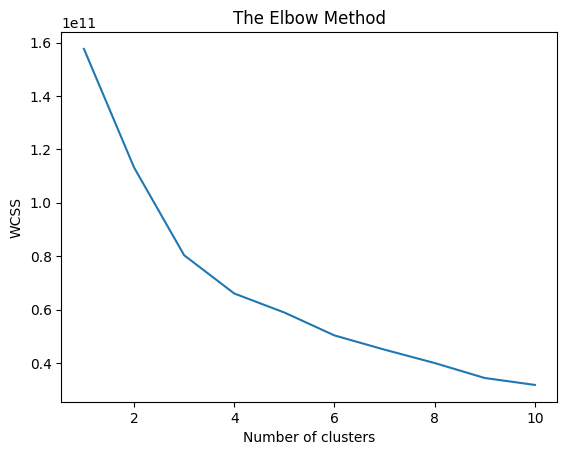

In [13]:
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### If you observe the plot 6 is the point where it decrease so our K value we will take as 6

In [15]:
kmeans = KMeans(n_clusters = 6)
               
y_kmeans = kmeans.fit_predict(X)

NameError: name 'X' is not defined

### Adding the cluster numbers to the dataset

In [16]:
df_cluster = df
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

NameError: name 'y_kmeans' is not defined

In [17]:
df_cluster.Cluster.value_counts()


AttributeError: 'DataFrame' object has no attribute 'Cluster'

In [18]:
### Cluster visualization with Principal Component Analysis - PCA

We cannot visualize our clusters that easily beacause our dataset is multidimentional. So we'll use the Principal Component Analysis to reduce our dataset to a two dimentional one, then add our identified clusters to visualize them.



Feature Scaling



In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(df)
pc_df = pd.DataFrame(pc)
pc_df.columns = ['pc1','pc2']

In [82]:
pca_clustering = pd.concat([pc_df,df_cluster['Cluster']],axis=1)


Visualizing our clusters on PCA axis



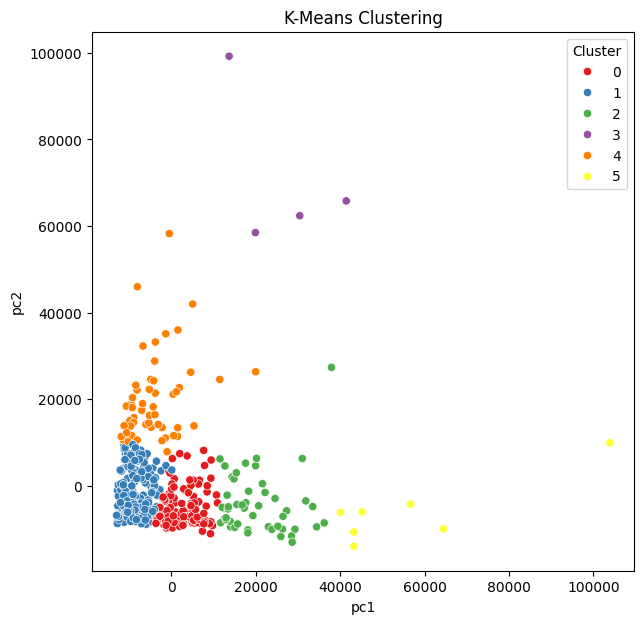

In [83]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'Cluster', data=pca_clustering,palette='Set1').set_title('K-Means Clustering')
plt.show()

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(df)
pc_df = pd.DataFrame(pc)
pc_df.columns = ['pc1','pc2']

In [85]:
X = df.iloc[:, :-1].values  # example: all columns except last


In [86]:
print(X.shape)
print(X[:5])

(440, 8)
[[    2     3 12669  9656  7561   214  2674  1338]
 [    2     3  7057  9810  9568  1762  3293  1776]
 [    2     3  6353  8808  7684  2405  3516  7844]
 [    1     3 13265  1196  4221  6404   507  1788]
 [    2     3 22615  5410  7198  3915  1777  5185]]


In [50]:
plt.figure(figsize=(8,6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [51]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [44]:
plt.figure(figsize=(10,7))
colors = plt.cm.get_cmap('tab10', n_clusters)  # tab10 colormap for distinct colors


C:\Users\chait\AppData\Local\Temp\ipykernel_12920\128985575.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)  # tab10 colormap for distinct colors


<Figure size 1000x700 with 0 Axes>

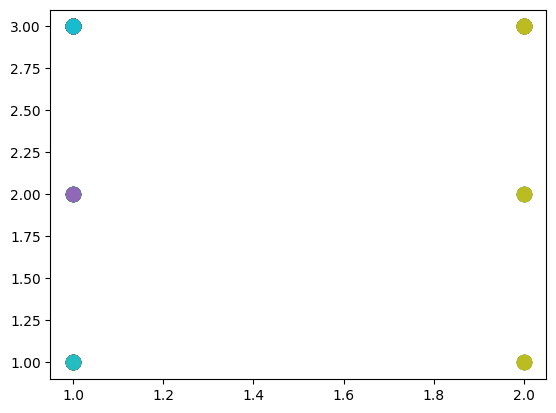

In [87]:
for i in range(n_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=100, alpha=0.7, label=f'Cluster {i+1}', color=colors(i))

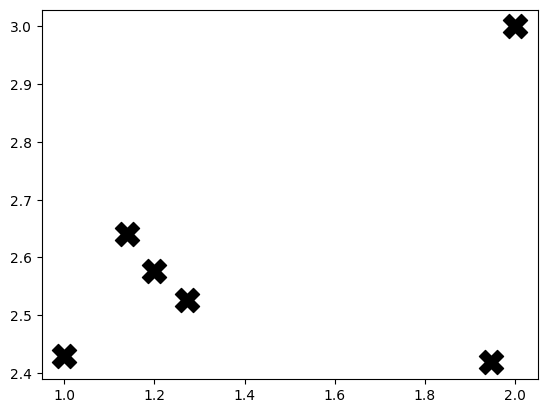

In [88]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='X', label='Centroids')



C:\Users\chait\AppData\Local\Temp\ipykernel_12920\253176738.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


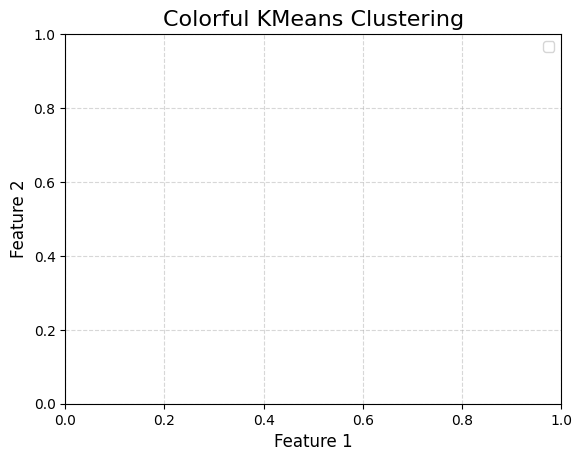

In [49]:
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Colorful KMeans Clustering', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Conclusion



The K-Means clustering model allowed us to segments the customers between 6 distinct groups. We were able to visualize these clusters after performing a dimensionality reduction with the Principle Component Analysis.